## Titanic Dataset Overview

The Titanic dataset is a famous dataset in machine learning and data analysis, containing information about passengers aboard the Titanic, which sank on its maiden voyage.

### Columns in the Titanic Dataset:

1. **Survived:**
   - Indicates whether a passenger survived or not.
   - **Values:** 
     - 0 = Did not survive
     - 1 = Survived

2. **Pclass (Passenger Class):**
   - Represents the ticket class of the passenger.
   - **Values:**
     - 1 = 1st class
     - 2 = 2nd class
     - 3 = 3rd class

3. **Name:**
   - Name of the passenger.

4. **Sex:**
   - Gender of the passenger.
   - **Values:**
     - Male
     - Female

5. **Age:**
   - Age of the passenger in years.

6. **SibSp (Siblings/Spouses Aboard):**
   - Indicates the number of siblings or spouses aboard the Titanic for a particular passenger.

7. **Parch (Parents/Children Aboard):**
   - Represents the number of parents or children aboard the Titanic for a particular passenger.

8. **Ticket:**
   - Ticket number of the passenger.

9. **Fare:**
   - The amount of money paid for the ticket by the passenger.

10. **Cabin:**
    - Cabin number where the passenger stayed (if available).

11. **Embarked:**
    - Port of embarkation for the passenger.
    - **Values:**
      - C = Cherbourg
      - Q = Queenstown
      - S = Southampton

#### If this Kernel helped you in any way, some <font color="red"><b>UPVOTES</b></font> would be very much appreciated

### Importance of Titanic Dataset:

- Utilized for predicting passenger survival based on various factors. Create a binary Logistics Regression model based on the data features.

#### Below are the steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Histogram
    - Barplot
    -Boxplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable
   - Rescaling
1. [Step 5: Remove Target variable from data set](#5)
1. [Step 6: Using Various Models](#6)
   - Logistic Regression
   - Random Forest
   - GBoost Model
   - SVM
   - KNN
   - Decision Tree
   - Naive Bayes
1. [Step 7: Model Evaluation](#7)
   - Recall
   - Precision
   - F1
   - Accuracy
   - AUC and ROC curve

In [1]:
# importing library to import data
from ucimlrepo import fetch_ucirepo 

# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
# Uploading the train_dataset
df_train = pd.read_csv("train.csv")

<a id="1"></a> <br>
## Step 1 : Reading and Understanding the Data

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


In [4]:
# Setting PassengerId as index column
df_train.set_index("PassengerId", inplace=True)

In [5]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S


In [6]:
# shape of the data
df_train.shape

(891, 11)

In [7]:
# Columns of dataset
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# information of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* Insight : There are null values in Age column and Cabin column. As Cabin coluns id not inmoratant for my model. So, I can remove Cabin column. But we need to take care of Age culumn.

In [9]:
# description of the data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0000,0.3838,0.4866,0.0000,0.0000,0.0000,1.0000,1.0000
Pclass,891.0000,2.3086,0.8361,1.0000,2.0000,3.0000,3.0000,3.0000
Age,714.0000,29.6991,14.5265,0.4200,20.1250,28.0000,38.0000,80.0000
SibSp,891.0000,0.5230,1.1027,0.0000,0.0000,0.0000,1.0000,8.0000
Parch,891.0000,0.3816,0.8061,0.0000,0.0000,0.0000,0.0000,6.0000
Fare,891.0000,32.2042,49.6934,0.0000,7.9104,14.4542,31.0000,512.3292


* Insight: The mean survival rate is approx 38%.

<a id="2"></a> <br>
## Step 2: Cleaning the Data

In [10]:
# Calculating the Missing Values % contribution in DF

df_null = df_train.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Cabin      77.1000
Age        19.8700
Embarked   0.2200 
Survived   0.0000 
Pclass     0.0000 
dtype: float64

* Insigt : The columns Cabin, Age and Embarked have missing values.

In [11]:
# Deleting some columns those are not important for model
df_train.drop(["Cabin", "Name", "Ticket"], axis = 1, inplace=True)

In [12]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0000,1,0,7.2500,S
2,1,1,female,38.0000,1,0,71.2833,C
3,1,3,female,26.0000,0,0,7.9250,S
4,1,1,female,35.0000,1,0,53.1000,S
5,0,3,male,35.0000,0,0,8.0500,S


In [13]:
# shape of the data
df_train.shape

(891, 8)

In [14]:
df_train['Survived'].unique()

array([0, 1])

In [15]:
df_train['Age'].isna().sum()

177

In [16]:
# 99.7% percentile of train dataset
fare_99th_percentile = df_train['Fare'].quantile(0.997)
print(f"The 99th percentile for the 'Fare' column is: {fare_99th_percentile:.2f}")

The 99th percentile for the 'Fare' column is: 345.28


In [17]:
df_train[df_train["Fare"]>=345.28]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
259,1,1,female,35.0000,0,0,512.3292,C
680,1,1,male,36.0000,0,1,512.3292,C
738,1,1,male,35.0000,0,0,512.3292,C


<a id="3"></a> <br>
## Step 3: Visualising the Data

- Here we will identify if some predictors directly have a strong association with the outcome variable `Survived`.

#### What can we check - Titanic Dataset:

Before delving into visualization steps, I recommend watching the `Titanic movie` to gain insights into the actual events. Here's what we aim to explore in the dataset based on correlations from the movie:

#### Survival Analysis:
1. **Total Survivors:** Understanding the overall count of survivors.
2. **Gender Disparity:** Exploring how gender impacted survival rates, noting if women had a higher survival count.
3. **Impact of Parenthood:** Analyzing if individuals with children were more likely to survive.
4. **Class-Based Survival:** Investigating the correlation between ticket classes and survival rates, specifically identifying the survival ratio among different ticket classes.

By referencing these insights from the historical Titanic event portrayed in the movie, we aim to draw parallels in our dataset analysis and potentially leverage these observations in our predictive modeling process.


In [18]:
print('Survived :', round(df_train['Survived'].value_counts()[1]/len(df_train) * 100,2), '%')
print('Not Survived :', round(df_train['Survived'].value_counts()[0]/len(df_train) * 100,2), '%')

Survived : 38.38 %
Not Survived : 61.62 %


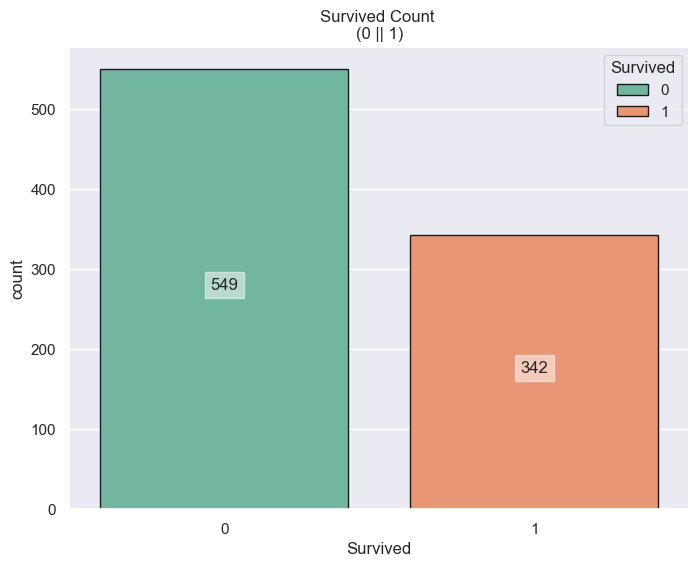

In [19]:
plt.figure(figsize=(8, 6))

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center',
                 bbox=dict(facecolor='white', alpha=0.5))


x = ['0', '1']  
y = [np.sum(df_train['Survived'] == 0), np.sum(df_train['Survived'] == 1)]

sns.countplot(data=df_train, x='Survived', edgecolor='k', palette='Set2')
addlabels(x, y)

plt.title('Survived Count \n(0 || 1)')
plt.xlabel('Survived')
plt.legend(title="Survived", labels=["0", "1"])
plt.show()


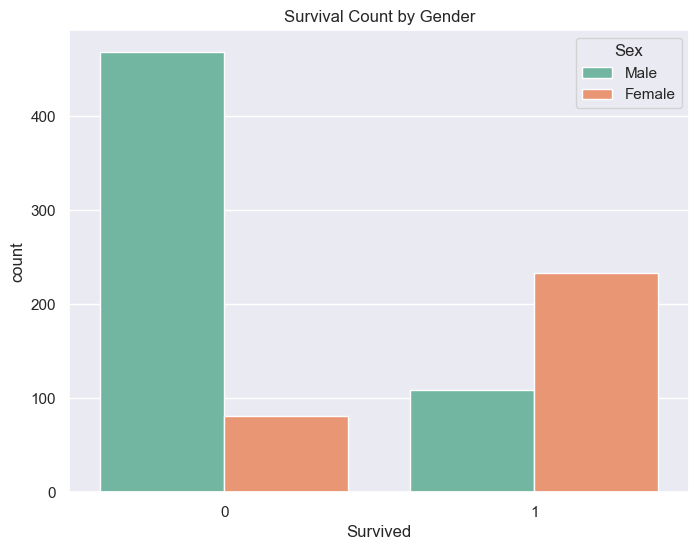

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Survived', hue='Sex', palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.legend(title='Sex', labels=['Male', 'Female'])  # Adding legend labels

plt.show()

* Insight: the count of survived female is more than the count of survived male.

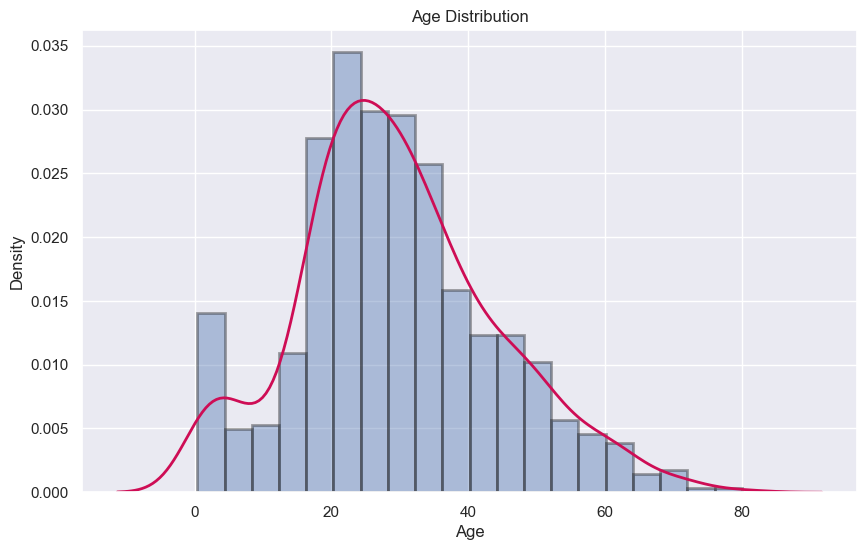

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(df_train['Age'], hist_kws=dict(edgecolor="k", linewidth=2), kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Age Distribution')
ax.set_xlabel('Age')
plt.show()

* Insight: Mostly passangers are between the age group of 20 years to 40 years.

In [22]:
# Handling missing value in Age column

# Calculate the mean age
mean_age = df_train['Age'].mean()

# Fill missing values in the 'Age' column with the mean age
df_train['Age'].fillna(mean_age, inplace=True)

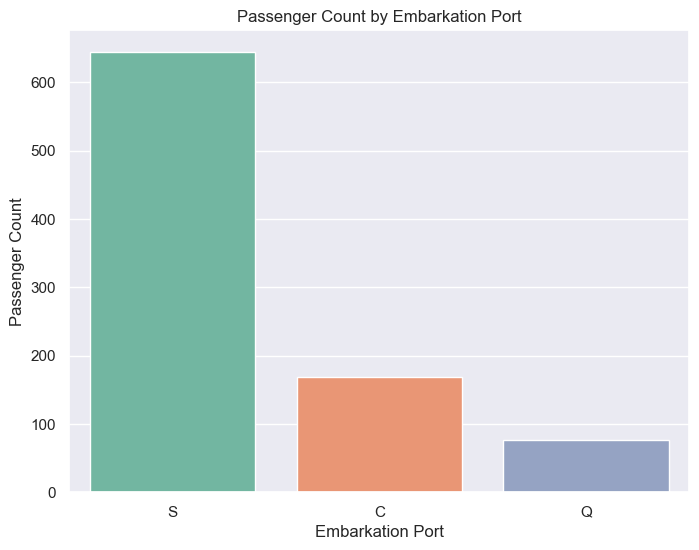

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Embarked', palette='Set2')

plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Passenger Count')

plt.show()

In [24]:
# Calculate the mode (most frequent value) for the 'Embarked' column (i.e., S)
mode_embarked = df_train['Embarked'].mode()[0]

# Fill missing values in the 'Embarked' column with the mode value
df_train['Embarked'].fillna(mode_embarked, inplace=True)

In [25]:
# Calculating the Missing Values % contribution in DF

df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

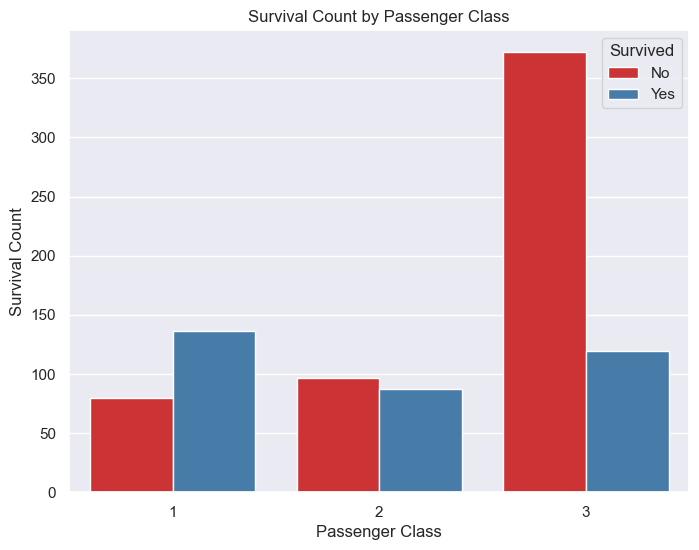

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='Pclass', hue='Survived', palette='Set1')

# Adding title and labels to the plot
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()


* Insight : For first-class passengers, their chances of survival were higher compared to third-class passengers. However, for second-class passengers, the rates of survival or death were similar.

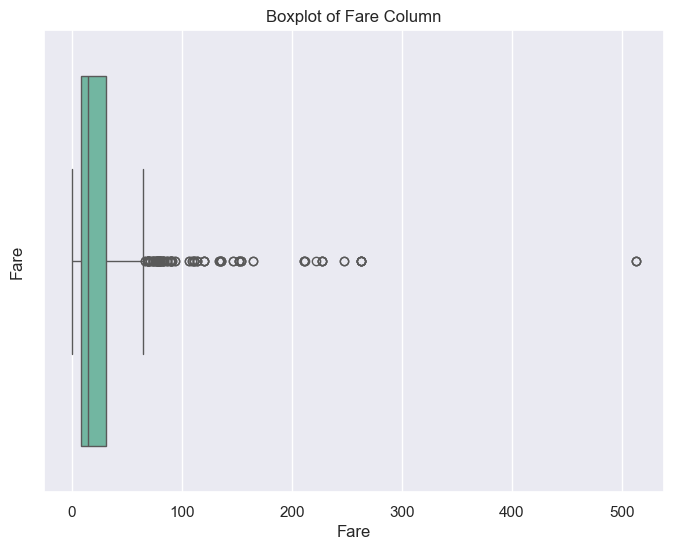

In [27]:
# Create a boxplot for the 'Fare' column
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.boxplot(x='Fare', data=df_train, orient='v', palette='Set2')
plt.title('Boxplot of Fare Column')
plt.ylabel('Fare')
plt.show()

In [28]:
df_train = df_train[df_train['Fare'] <= 345.28].copy()

* Insight: Filtering observations with fare prices exceeding the 99.7th percentile could enhance model accuracy by mitigating the influence of outlier fares. Eliminating exceptionally high fare prices, likely rare anomalies, can lead to a more robust and accurate model by focusing on general fare price patterns.


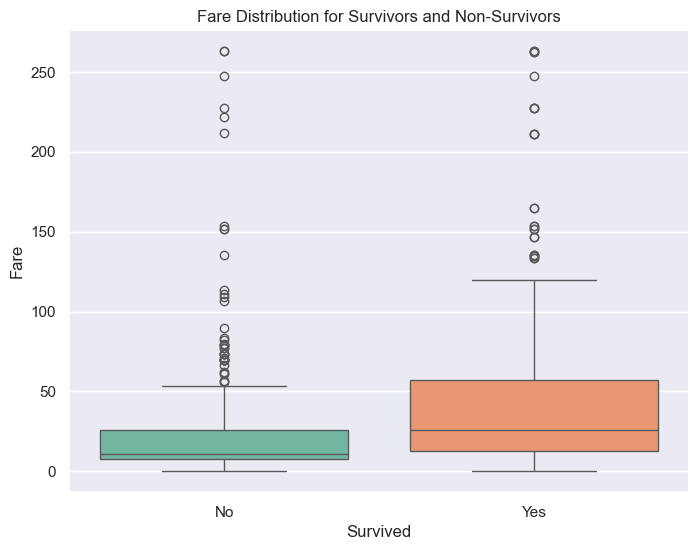

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_train, x='Survived', y='Fare', palette='Set2')

# Adding title and labels to the plot
plt.title('Fare Distribution for Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])  # Changing x-axis ticks to 'No' and 'Yes' for better readability

plt.show()


* Insight: The survival rate is higher for those who purchased more expensive (costly) tickets.

In [30]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_train.select_dtypes(include=['object']).columns
num_col = df_train.select_dtypes(exclude=['object']).columns
df_cat = df_train[cat_col]
df_num = df_train[num_col]

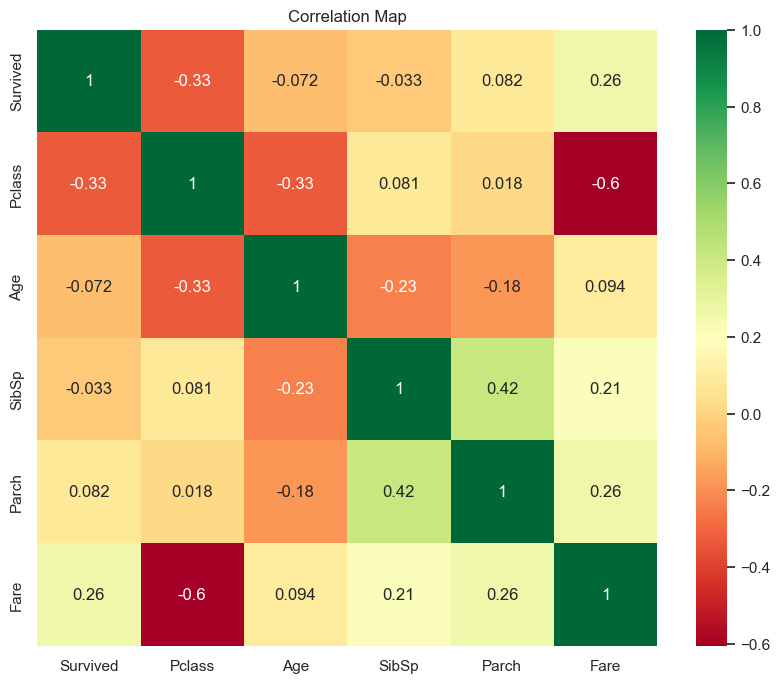

In [31]:
corr_train = df_num
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_train.corr(), cmap='RdYlGn', annot=True)
ax.set_title('Correlation Map')
plt.show()

### Insights:

- There is a notable correlation between 'Fare' and 'Survived'. Passengers who paid higher fares tended to have a higher survival rate.
- Additionally, a positive correlation exists between 'Parch' (number of parents/children aboard) and 'Survived'. Higher values in the 'Parch' column are associated with a higher likelihood of survival.
- Both 'Fare' and 'Parch' columns demonstrate significance and relevance for our predictive model, indicating their importance in predicting passenger survival.


<a id="4"></a> <br>
## Step 4: Data Preparation

Convert the categorical variables to numeric.

For this, we will use something called `dummy variables`.

In [32]:
# Applying one-hot encoding (dummy variables) to 'Embarked' and 'Sex' columns for train
df_train = pd.get_dummies(df_train, columns=['Embarked', 'Sex'], drop_first=True)

df_train.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,
1,0,3,22.0000,1,0,7.2500,0,1,1
2,1,1,38.0000,1,0,71.2833,0,0,0
3,1,3,26.0000,0,0,7.9250,0,1,0
4,1,1,35.0000,1,0,53.1000,0,1,0
5,0,3,35.0000,0,0,8.0500,0,1,1


### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [33]:
numerical_columns = ["Age", "Fare"]
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,,
1,0,3,-0.5902,1,0,-0.5670,0,1,1
2,1,1,0.6394,1,0,0.9890,0,0,0
3,1,3,-0.2828,0,0,-0.5506,0,1,0
4,1,1,0.4088,1,0,0.5472,0,1,0
5,0,3,0.4088,0,0,-0.5475,0,1,1


#### Test data
* We need to apply the same operations that we applied to the train data.

In [34]:
df_test = pd.read_csv("test.csv")

In [35]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S


In [36]:
df_test.set_index("PassengerId", inplace=True)

In [37]:
df_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5000,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0000,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0000,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0000,1,1,3101298,12.2875,NaN,S


In [38]:
# Deleting unimportant columns from the test dataset
df_test.drop(["Cabin", "Name", "Ticket"], axis = 1, inplace=True)

In [39]:
# Applying one-hot encoding (dummy variables) to 'Embarked' and 'Sex' columns for test data
df_test = pd.get_dummies(df_test, columns=['Embarked', 'Sex'], drop_first=True)

df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,
892,3,34.5000,0,0,7.8292,1,0,1
893,3,47.0000,1,0,7.0000,0,1,0
894,2,62.0000,0,0,9.6875,1,0,1
895,3,27.0000,0,0,8.6625,0,1,1
896,3,22.0000,1,1,12.2875,0,1,0


In [40]:
# Scalling the test data set
numerical_columns = ["Age", "Fare"]
scaler = StandardScaler()
df_test[numerical_columns] = scaler.fit_transform(df_test[numerical_columns])
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
PassengerId,,,,,,,,
892,3,0.2985,0,0,-0.4978,1,0,1
893,3,1.1813,1,0,-0.5127,0,1,0
894,2,2.2407,0,0,-0.4645,1,0,1
895,3,-0.2311,0,0,-0.4829,0,1,1
896,3,-0.5842,1,1,-0.4180,0,1,0


In [41]:
# Calculating the Missing Values % contribution in DF
df_null = df_test.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Age      20.5700
Fare     0.2400 
Pclass   0.0000 
SibSp    0.0000 
Parch    0.0000 
dtype: float64

In [42]:
# Handling missing value in Age and fair column

# Calculate the mean age
mean_age = df_test['Age'].mean()

# Fill missing values in the 'Age' column with the mean age
df_test['Age'].fillna(mean_age, inplace=True)

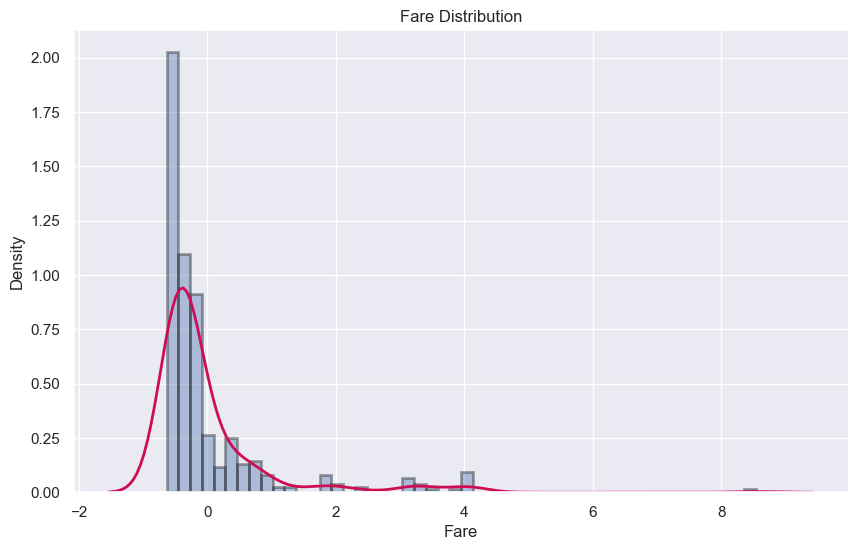

In [43]:
plt.figure(figsize=(10, 6))
ax = sns.distplot(df_test['Fare'], hist_kws=dict(edgecolor="k", linewidth=2), kde_kws={"color": "#ce0d55", "lw": 2})
ax.set_title('Fare Distribution')
ax.set_xlabel('Fare')
plt.show()

In [44]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fill missing values in the 'Fare' column with the median value
df_test['Fare'] = imputer.fit_transform(df_test[['Fare']])


In [45]:
# Calculating the Missing Values % contribution in DF

df_test.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

<a id="5"></a> <br>
## Step 5: Remove Target variable from data set

In [46]:
X = df_train.drop('Survived', axis=1)  # Features
y = df_train['Survived']  # Target variable

# Splitting data into train and test sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id="6"></a> <br>
## Step 6: Using Various Models

<font color='gray'> 

## Logistic Regression

</font>


Logistic Regression is a fundamental statistical method used for binary classification tasks. Unlike linear regression, it predicts the probability of an observation belonging to a particular class by applying the logistic function. This model is well-suited for problems where the dependent variable is categorical and has two possible outcomes. It's computationally efficient and provides interpretable results, making it a popular choice for various predictive modeling tasks.


In [47]:
model_lr = LogisticRegression()

# Fitting the model on the training data
model_lr.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_lr.predict(X_test)

# Calculating the accuracy
logistic_regression_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", logistic_regression_accuracy)

Accuracy of the Logistic Regression model: 0.8146067415730337


In [48]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       104
           1       0.76      0.81      0.78        74

    accuracy                           0.81       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



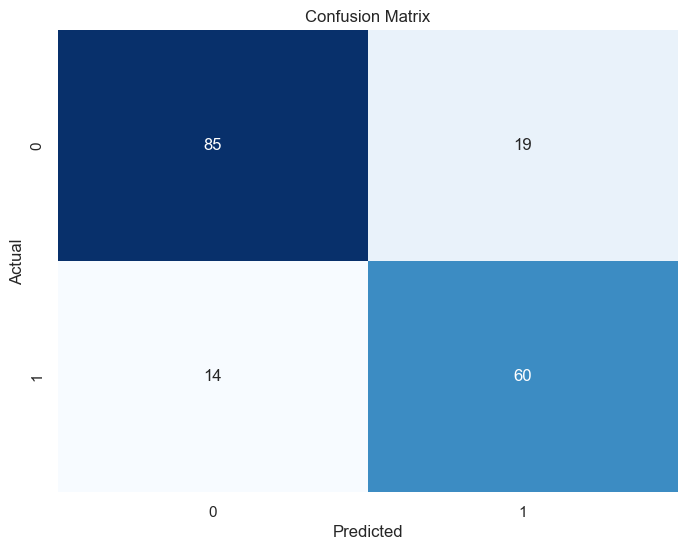

In [49]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Random Forest

</font>


Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training. Each tree in the forest independently predicts the target variable, and the final prediction is determined by averaging the predictions (regression) or taking a majority vote (classification) from all the trees. It's known for its robustness against overfitting, handles high-dimensional data well, and generally provides high predictive accuracy.

In [50]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

# Fitting the model on the training data
model_rf.fit(X_train, y_train)

# Predicting on the test data
y_pred = model_rf.predict(X_test)

# Calculating the accuracy
random_forest_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model:", random_forest_accuracy)

Accuracy of the Random Forest model: 0.8258426966292135


In [51]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       104
           1       0.79      0.80      0.79        74

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



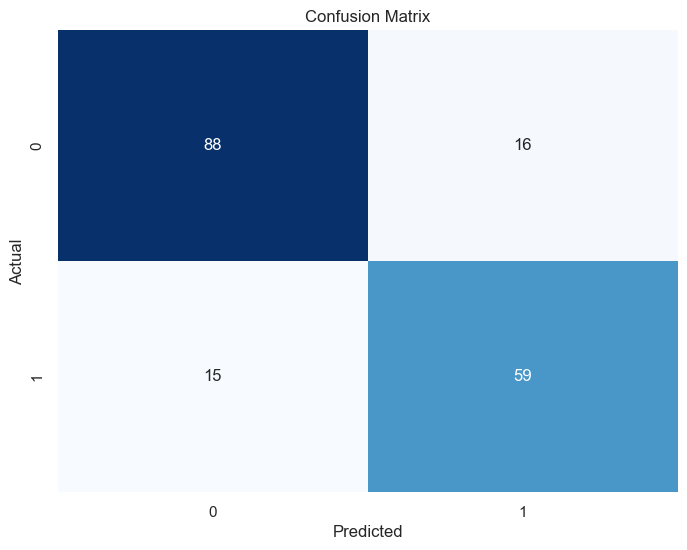

In [52]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Gradient Boosting

</font>


Gradient Boosting is an ensemble learning technique that builds multiple decision trees sequentially, aiming to minimize errors made by the previous trees. It combines weak learners into a strong learner by focusing on the residuals or mistakes of the previous predictors. Gradient Boosting typically provides high predictive accuracy and is robust against overfitting, making it suitable for various regression and classification tasks.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier


# Initialize the Gradient Boosting Classifier (GBM)
model_GB = GradientBoostingClassifier(random_state=45)  # You can adjust hyperparameters here

# Fit the model on the training data
model_GB.fit(X_train, y_train)

# Predict on the validation set
y_pred = model_GB.predict(X_test)

# Calculate the accuracy of the model
gboost_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gradient Boosting Classifier:", gboost_accuracy)

Accuracy of the Gradient Boosting Classifier: 0.848314606741573


In [54]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.84      0.78      0.81        74

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



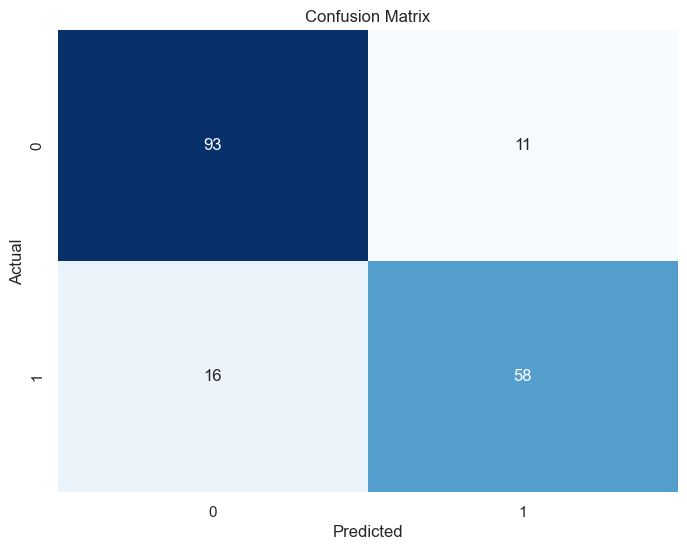

In [55]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Support Vector Machine

</font>


Support Vector Machine is a powerful supervised learning algorithm used for classification and regression tasks. It aims to find the optimal hyperplane that best separates different classes in the feature space. SVM works by maximizing the margin between classes while minimizing classification errors. It's effective in handling high-dimensional data and works well in scenarios with clear class boundaries.

In [56]:
from sklearn.svm import SVC  

# Initialize the Support Vector Classifier (SVM)
model_svm = SVC()  

# Fit the SVM model on the training data
model_svm.fit(X_train, y_train)

# Predict on the validation set using SVM
y_pred_svm = model_svm.predict(X_test)

# Calculate the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy of the Support Vector Machine (SVM):", svm_accuracy)


Accuracy of the Support Vector Machine (SVM): 0.848314606741573


In [57]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       104
           1       0.84      0.78      0.81        74

    accuracy                           0.85       178
   macro avg       0.85      0.84      0.84       178
weighted avg       0.85      0.85      0.85       178



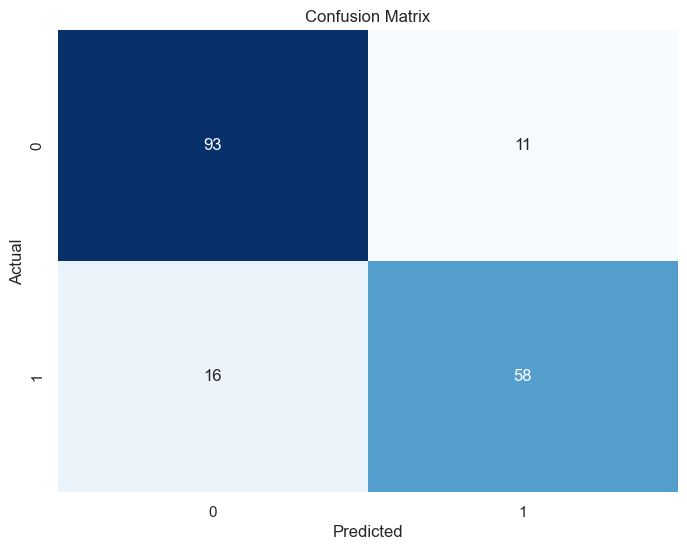

In [58]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## KNN

</font>


K-Nearest Neighbors is a simple yet effective non-parametric algorithm used for both classification and regression tasks. It makes predictions based on the majority class or average of the k-nearest data points in the feature space. KNN doesn't involve model training, storing the entire dataset for prediction, and its performance heavily relies on the choice of k and distance metrics.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors Classifier (KNN)
model_knn = KNeighborsClassifier()

# Fit the KNN model on the training data
model_knn.fit(X_train, y_train)

# Predict on the validation set using KNN
y_pred = model_knn.predict(X_test)

# Calculate the accuracy of the KNN model
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the K-Nearest Neighbors (KNN) Classifier:", knn_accuracy)

Accuracy of the K-Nearest Neighbors (KNN) Classifier: 0.8426966292134831


In [60]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       104
           1       0.81      0.81      0.81        74

    accuracy                           0.84       178
   macro avg       0.84      0.84      0.84       178
weighted avg       0.84      0.84      0.84       178



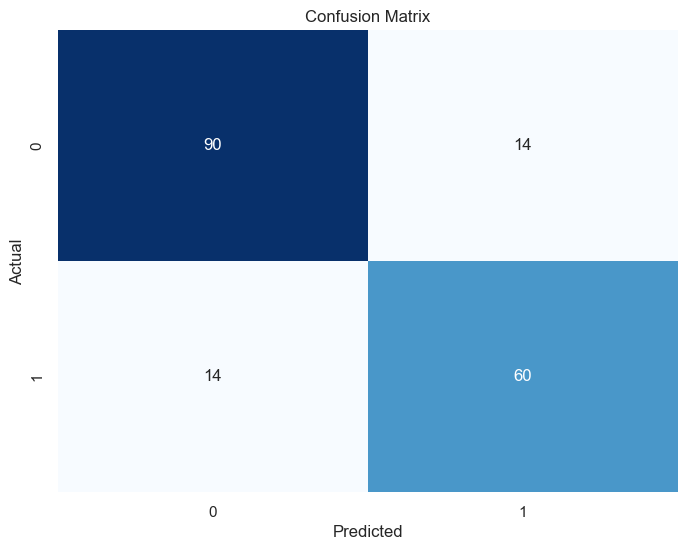

In [61]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Decision Tree

</font>


Decision Tree is a versatile supervised learning algorithm used for both classification and regression tasks. It partitions the feature space into segments based on the features' values, forming a tree-like structure to make predictions. Each node in the tree represents a feature and a decision point, optimizing to minimize impurity or maximize information gain at each step. Decision Trees are easy to interpret and visualize, making them valuable in understanding feature importance.

In [62]:
from sklearn.tree import DecisionTreeClassifier  

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()  

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", decision_tree_accuracy)


Accuracy of the Decision Tree model: 0.797752808988764


In [63]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       104
           1       0.77      0.73      0.75        74

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



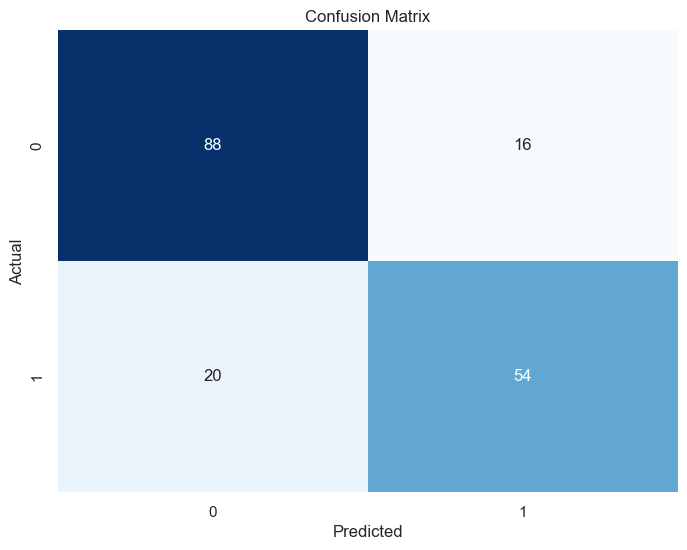

In [64]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

<font color='gray'> 

## Naive Bayes

</font>


Naive Bayes is a family of simple probabilistic classifiers based on Bayes' theorem, assuming independence among features. Despite its "naive" assumption, it often performs well in classification tasks. It calculates the probability of an observation belonging to a certain class using the probability of features occurring in that class. Naive Bayes is computationally efficient, particularly for large datasets with high-dimensional features.


In [65]:
from sklearn.naive_bayes import GaussianNB  

# Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the accuracy
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Gaussian Naive Bayes model:", naive_bayes_accuracy)


Accuracy of the Gaussian Naive Bayes model: 0.7921348314606742


In [66]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       104
           1       0.73      0.80      0.76        74

    accuracy                           0.79       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.79      0.79       178



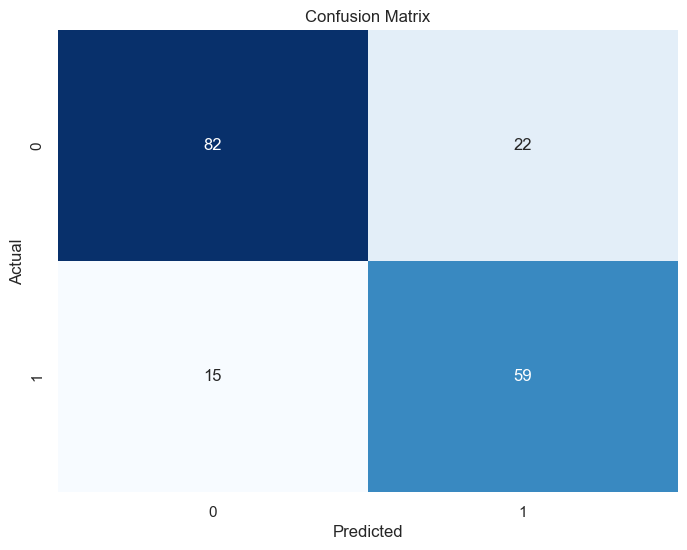

In [67]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [68]:
# For train data
model_accuracies_train = {
    'Logistic Regression': logistic_regression_accuracy,
    'Random Forest': random_forest_accuracy,
    'Gradient Boosting': gboost_accuracy,
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Naive Bayes': naive_bayes_accuracy
}

accuracy_df = pd.DataFrame(list(model_accuracies_train.items()), columns=['Model Name', 'Accuracy'])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

accuracy_df

,Model Name,Accuracy
2,Gradient Boosting,0.8483
3,SVM,0.8483
4,KNN,0.8427
1,Random Forest,0.8258
0,Logistic Regression,0.8146
5,Decision Tree,0.7978
6,Naive Bayes,0.7921


### Test Dataset (Result after submitting .csv file)

In [69]:
Survived = model_lr.predict(df_test)

In [70]:
PassengerId = df_test.index

In [71]:
Result1 = pd.DataFrame({'PassengerId': PassengerId, 'Survived': Survived})

In [72]:
Result1.to_csv('result.csv', index=False)

In [73]:
# For test data (After submitting .csv file the accuracies)
model_accuracies = {
    'Logistic Regression': 0.75837,
    'Random Forest': 0.76794,
    'Gradient Boosting': 0.77751,
    'SVM': 0.77751,
    'KNN': 0.72727,
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model Name', 'Accuracy'])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

accuracy_df

,Model Name,Accuracy
2,Gradient Boosting,0.7775
3,SVM,0.7775
1,Random Forest,0.7679
0,Logistic Regression,0.7584
4,KNN,0.7273


### Conclusion:

On the unknown dataset (i.e., test dataset), the achieved accuracy is 77.8%. While this accuracy isn't very high, it's acceptable for the first competition submission. However, there is ample room for improvement in our overall results.

#### Improving Accuracy:
To enhance our performance, it's crucial to focus on data cleaning and data wrangling processes. These steps can significantly impact the quality of our predictions and potentially boost our model's accuracy.

#### Future Steps:
1. **Feature Engineering:** Explore additional features that might capture more meaningful patterns in the data.
2. **Model Tuning:** Fine-tune hyperparameters and possibly consider more advanced algorithms.
3. **Ensemble Methods:** Experiment with ensemble techniques to combine multiple models for better predictive performance.

#### Seeking Feedback and Offering Help:
Your suggestions and insights on improving accuracy are highly valued! If you have any suggestions or require clarification on this kernel, please feel free to comment. I'm more than happy to assist or discuss further. Collaboration leads to better outcomes, and your input is appreciated.


### If this Kernel helped you in any way, some <font color="red"><b>UPVOTES</b></font> would be very much appreciated